Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports

from sklearn.model_selection import train_test_split # To split data
from sklearn.preprocessing import StandardScaler # To standardize features
from sklearn.linear_model import LogisticRegression # The classification model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score # More metrics
from sklearn.metrics import roc_curve, auc, RocCurveDisplay # For ROC-AUC curve

# Configure settings
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # Adjust precision if needed
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

Libraries imported successfully.


 Load and Preprocess Dataset

In [19]:
# 1. Load data from CSV
df = pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data Set.csv')

print(f"Original DataFrame shape: {df.shape}\n")
print("Original columns:\n", df.columns)

Original DataFrame shape: (569, 33)

Original columns:
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [20]:
# 2. Initial Inspection & Cleanup
print("\nFirst 5 Rows (Original):")
display(df.head())


First 5 Rows (Original):


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99000,10.38000,122.80000,1001.00000,0.11840,0.27760,0.30010,0.14710,0.24190,0.07871,1.09500,0.90530,8.58900,153.40000,0.00640,0.04904,0.05373,0.01587,0.03003,0.00619,25.38000,17.33000,184.60000,2019.00000,0.16220,0.66560,0.71190,0.26540,0.46010,0.11890,NaN
1,842517,M,20.57000,17.77000,132.90000,1326.00000,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,0.54350,0.73390,3.39800,74.08000,0.00522,0.01308,0.01860,0.01340,0.01389,0.00353,24.99000,23.41000,158.80000,1956.00000,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902,NaN
2,84300903,M,19.69000,21.25000,130.00000,1203.00000,0.10960,0.15990,0.19740,0.12790,0.20690,0.05999,0.74560,0.78690,4.58500,94.03000,0.00615,0.04006,0.03832,0.02058,0.02250,0.00457,23.57000,25.53000,152.50000,1709.00000,0.14440,0.42450,0.45040,0.24300,0.36130,0.08758,NaN
3,84348301,M,11.42000,20.38000,77.58000,386.10000,0.14250,0.28390,0.24140,0.10520,0.25970,0.09744,0.49560,1.15600,3.44500,27.23000,0.00911,0.07458,0.05661,0.01867,0.05963,0.00921,14.91000,26.50000,98.87000,567.70000,0.20980,0.86630,0.68690,0.25750,0.66380,0.17300,NaN
4,84358402,M,20.29000,14.34000,135.10000,1297.00000,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,0.75720,0.78130,5.43800,94.44000,0.01149,0.02461,0.05688,0.01885,0.01756,0.00511,22.54000,16.67000,152.20000,1575.00000,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678,NaN


In [21]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri

In [22]:
# --- Data Cleaning ---
# Drop the 'id' column as it's not a predictor
if 'id' in df.columns:
    df = df.drop('id', axis=1)
    print("\nDropped 'id' column.")


Dropped 'id' column.


In [23]:
# Handle potential empty trailing column if it exists (check df.info() or df.columns)
# Common names are 'Unnamed: 32', etc.
# Let's check for columns starting with 'Unnamed'
unnamed_cols = [col for col in df.columns if col.startswith('Unnamed:')]
if unnamed_cols:
    df = df.drop(unnamed_cols, axis=1)
    print(f"Dropped unnamed columns: {unnamed_cols}")

Dropped unnamed columns: ['Unnamed: 32']


In [24]:
print("\nChecking for Missing Values after initial cleanup:")
print(df.isnull().sum())

print(f"Total missing values: {df.isnull().sum().sum()}")


Checking for Missing Values after initial cleanup:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Total missing values: 0


In [25]:
# 3. Encode the Target Variable ('diagnosis')
# Convert 'M' (Malignant) and 'B' (Benign) to numerical format (e.g., 1 and 0)
# Let's choose M=1 (Malignant - often the class of interest) and B=0 (Benign)
if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
    print("\nEncoded 'diagnosis' column: Mapped 'M' to 1, 'B' to 0.")
    print("Target Variable Distribution (after encoding):")
    print(df['diagnosis'].value_counts())
else:
    print("\nError: 'diagnosis' column not found!")

# Define target names based on our mapping
target_names = ['Benign (0)', 'Malignant (1)']


Encoded 'diagnosis' column: Mapped 'M' to 1, 'B' to 0.
Target Variable Distribution (after encoding):
diagnosis
0    357
1    212
Name: count, dtype: int64


In [26]:
# 4. Separate Features (X) and Target (y)
X = df.drop('diagnosis', axis=1) # Features are all remaining columns
y = df['diagnosis']             # Encoded target variable

print("\n--- Final Shapes ---")
print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)
print("\nFeatures columns:", X.columns.tolist())
print("\nSample of Features (X):")
display(X.head(3))
print("\nSample of Target (y):")
print(y.head(3).to_string()) # .to_string() for better display of Series head


--- Final Shapes ---
Shape of Features (X): (569, 30)
Shape of Target (y): (569,)

Features columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Sample of Features (X):


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99000,10.38000,122.80000,1001.00000,0.11840,0.27760,0.30010,0.14710,0.24190,0.07871,1.09500,0.90530,8.58900,153.40000,0.00640,0.04904,0.05373,0.01587,0.03003,0.00619,25.38000,17.33000,184.60000,2019.00000,0.16220,0.66560,0.71190,0.26540,0.46010,0.11890
1,20.57000,17.77000,132.90000,1326.00000,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,0.54350,0.73390,3.39800,74.08000,0.00522,0.01308,0.01860,0.01340,0.01389,0.00353,24.99000,23.41000,158.80000,1956.00000,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902
2,19.69000,21.25000,130.00000,1203.00000,0.10960,0.15990,0.19740,0.12790,0.20690,0.05999,0.74560,0.78690,4.58500,94.03000,0.00615,0.04006,0.03832,0.02058,0.02250,0.00457,23.57000,25.53000,152.50000,1709.00000,0.14440,0.42450,0.45040,0.24300,0.36130,0.08758



Sample of Target (y):
0    1
1    1
2    1


Train/Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [28]:
print("--- Data Split Shapes ---")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

--- Data Split Shapes ---
X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)


In [29]:
print("Training set target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set target distribution:")
print(y_test.value_counts(normalize=True))

Training set target distribution:
diagnosis
0   0.62814
1   0.37186
Name: proportion, dtype: float64

Test set target distribution:
diagnosis
0   0.62573
1   0.37427
Name: proportion, dtype: float64


Standardize Features

In [30]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data features
scaler.fit(X_train)

# Transform both the training and testing data features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Convert scaled arrays back to DataFrames for inspection
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [32]:
print("--- Feature Scaling Completed ---")
print("Scaled X_train_scaled description (Mean ~0, Stddev ~1):")
display(X_train_scaled_df.describe())

--- Feature Scaling Completed ---
Scaled X_train_scaled description (Mean ~0, Stddev ~1):


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000,398.00000
mean,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000
std,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126,1.00126
min,-2.01354,-2.25347,-1.97053,-1.44895,-2.31851,-1.55876,-1.09167,-1.23583,-2.78200,-1.73824,-1.06122,-1.54078,-1.04877,-0.76985,-1.80622,-1.27972,-0.97633,-1.85505,-1.48788,-1.06574,-1.72634,-2.27624,-1.69271,-1.23272,-2.56642,-1.43102,-1.30058,-1.72711,-2.09999,-1.58279
25%,-0.69152,-0.72000,-0.69202,-0.67624,-0.74879,-0.74856,-0.72777,-0.73491,-0.70464,-0.72096,-0.62841,-0.69869,-0.63174,-0.51781,-0.60464,-0.68289,-0.53057,-0.65262,-0.64180,-0.57372,-0.68434,-0.71204,-0.69735,-0.65210,-0.73375,-0.69261,-0.74386,-0.75825,-0.62441,-0.69888
50%,-0.21740,-0.09457,-0.22687,-0.30171,-0.04918,-0.21907,-0.35597,-0.38792,-0.05772,-0.19091,-0.31493,-0.19391,-0.27957,-0.36054,-0.21879,-0.29867,-0.19343,-0.11493,-0.20485,-0.24126,-0.27269,-0.07220,-0.28710,-0.35073,-0.04474,-0.25781,-0.21327,-0.22998,-0.14242,-0.20847
75%,0.48073,0.56156,0.50254,0.38288,0.62348,0.50361,0.53725,0.56139,0.51445,0.48762,0.27458,0.46757,0.24764,0.11720,0.40639,0.36354,0.27404,0.42039,0.29499,0.26277,0.58928,0.71256,0.57023,0.42414,0.60956,0.53426,0.53171,0.71904,0.42691,0.43957
max,3.94042,4.59618,3.95608,5.21934,4.69596,4.54429,4.17319,3.88727,4.03239,4.88916,8.86363,6.59256,9.49689,11.15452,8.38976,4.54283,11.00543,6.59970,6.94477,9.69535,3.47337,3.86758,3.62055,4.50204,3.80530,5.12104,4.64403,2.65472,5.81294,6.79001


 Train Logistic Regression Model

In [33]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42) # Default uses L2 regularization

# Train (fit) the model using the SCALED training data
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [34]:
print("--- Model Training ---")
print("Logistic Regression model trained successfully.")

# Display coefficients (optional, but insightful)
print("\nModel coefficients (weights for each feature):")

# Create a DataFrame for coefficients for better readability
# model.coef_[0] gets the coefficients for the positive class (Malignant=1)
coef_df = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])

# Display coefficients sorted by magnitude (absolute value) to see most influential features
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
print(coef_df.sort_values('Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1))

print("\nModel intercept:", model.intercept_[0])

--- Model Training ---
Logistic Regression model trained successfully.

Model coefficients (weights for each feature):
                         Coefficient
texture_worst                1.38433
radius_se                    1.20513
symmetry_worst               1.08574
area_se                      0.91211
compactness_se              -0.90463
area_worst                   0.87608
concave points_mean          0.85392
radius_worst                 0.84501
concavity_worst              0.83255
concavity_mean               0.80594
perimeter_se                 0.77813
perimeter_worst              0.71150
concave points_worst         0.68685
fractal_dimension_se        -0.51221
texture_mean                 0.49309
smoothness_worst             0.45996
compactness_mean            -0.45586
area_mean                    0.40981
concave points_se            0.40707
texture_se                  -0.39584
smoothness_mean              0.39101
symmetry_se                 -0.32925
perimeter_mean               0

Make Predictions

In [35]:
# Predict class labels (0 or 1) on the SCALED test data (using default 0.5 threshold)
y_pred = model.predict(X_test_scaled)

# Predict probabilities for each class [Prob(Class 0), Prob(Class 1)]
y_pred_proba = model.predict_proba(X_test_scaled)

# Extract probabilities for the positive class (Malignant = 1)
y_pred_proba_positive = y_pred_proba[:, 1]

In [36]:
print("--- Predictions ---")
print("Sample Predicted Labels (y_pred):", y_pred[:10])
print("Sample Actual Labels      (y_test):", y_test.values[:10])
print("\nSample Predicted Probabilities [Prob(Benign=0), Prob(Malignant=1)]:")
print(y_pred_proba[:5])

--- Predictions ---
Sample Predicted Labels (y_pred): [0 0 0 0 0 0 1 0 1 0]
Sample Actual Labels      (y_test): [0 0 0 0 0 0 1 0 1 0]

Sample Predicted Probabilities [Prob(Benign=0), Prob(Malignant=1)]:
[[8.86621651e-01 1.13378349e-01]
 [9.97675879e-01 2.32412069e-03]
 [9.99909271e-01 9.07292766e-05]
 [9.96897539e-01 3.10246072e-03]
 [9.80976674e-01 1.90233256e-02]]


Evaluate - Confusion Matrix, Precision, Recall 

--- Model Evaluation (Default Threshold 0.5) ---

Confusion Matrix:
[[106   1]
 [  4  60]]


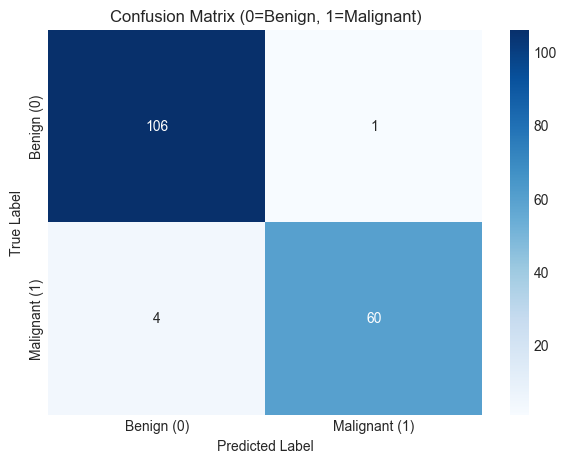

In [37]:
print("--- Model Evaluation (Default Threshold 0.5) ---")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, # Use defined names ['Benign (0)', 'Malignant (1)']
            yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (0=Benign, 1=Malignant)')
plt.show()

In [38]:
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN - Correctly predicted Benign): {tn}")
print(f"False Positives (FP - Predicted Malignant, was Benign): {fp}")
print(f"False Negatives (FN - Predicted Benign, was Malignant): {fn}")
print(f"True Positives (TP - Correctly predicted Malignant): {tp}")

True Negatives (TN - Correctly predicted Benign): 106
False Positives (FP - Predicted Malignant, was Benign): 1
False Negatives (FN - Predicted Benign, was Malignant): 4
True Positives (TP - Correctly predicted Malignant): 60


In [39]:
# --- Classification Report ---
report = classification_report(y_test, y_pred, target_names=target_names)
print("\nClassification Report:")
print(report)


Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.98       107
Malignant (1)       0.98      0.94      0.96        64

     accuracy                           0.97       171
    macro avg       0.97      0.96      0.97       171
 weighted avg       0.97      0.97      0.97       171



In [40]:
# --- Individual Metrics ---
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, F1 for the POSITIVE class (Malignant = 1)
# Explicitly set pos_label=1
precision_malignant = precision_score(y_test, y_pred, pos_label=1)
recall_malignant = recall_score(y_test, y_pred, pos_label=1)
f1_malignant = f1_score(y_test, y_pred, pos_label=1)

In [41]:
print("\n--- Key Metrics Summary ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (for Malignant=1): {precision_malignant:.4f}")
print(f"Recall (Sensitivity for Malignant=1): {recall_malignant:.4f}")
print(f"F1-Score (for Malignant=1): {f1_malignant:.4f}")


--- Key Metrics Summary ---
Accuracy: 0.9708
Precision (for Malignant=1): 0.9836
Recall (Sensitivity for Malignant=1): 0.9375
F1-Score (for Malignant=1): 0.9600


 Evaluate - ROC-AUC Curve

In [42]:
# Calculate FPR, TPR for the ROC curve
# Use the probabilities of the POSITIVE class (Malignant = 1)
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_positive, pos_label=1)

# Calculate AUC
roc_auc = auc(fpr, tpr)

print("\n--- ROC Curve and AUC ---")
print(f"Area Under the Curve (AUC): {roc_auc:.4f}")


--- ROC Curve and AUC ---
Area Under the Curve (AUC): 0.9975


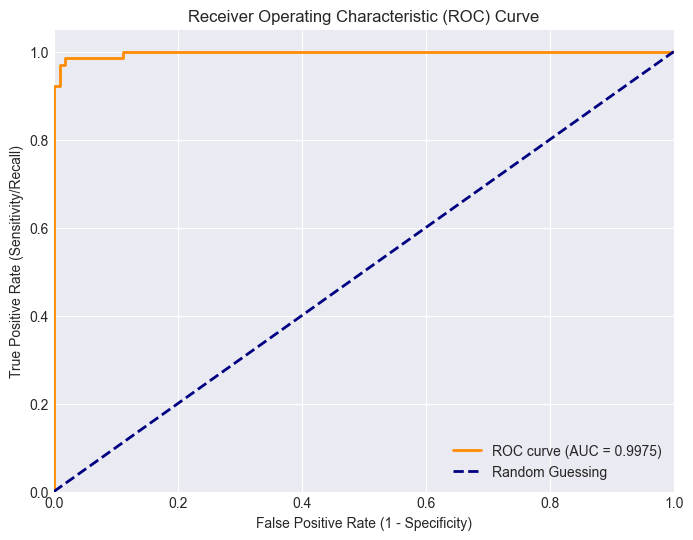

In [43]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Sigmoid Function Explanation

In [44]:
# --- Sigmoid Function Explanation ---
# (Code is the same as previous example)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_values = np.linspace(-10, 10, 200)
probabilities = sigmoid(z_values)

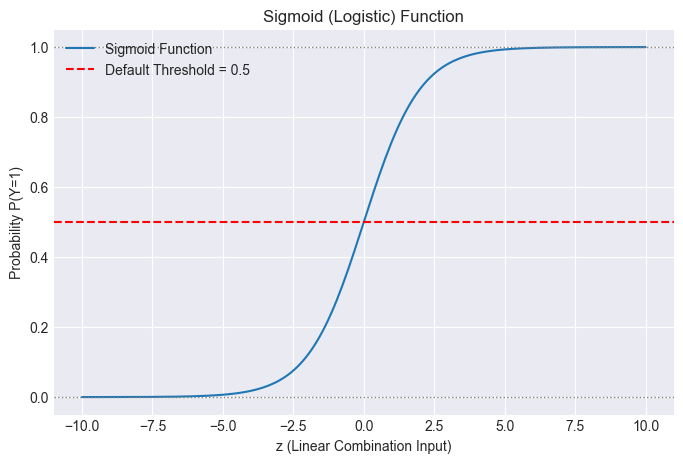

The sigmoid function maps the linear model output 'z' to a probability between 0 and 1.
This probability is used to classify the instance, typically using a 0.5 threshold.


In [46]:
plt.figure(figsize=(8, 5))
plt.plot(z_values, probabilities, label='Sigmoid Function')
plt.axhline(y=0.5, color='red', linestyle='--', label='Default Threshold = 0.5')
plt.axhline(y=0.0, color='grey', linestyle=':', lw=1)
plt.axhline(y=1.0, color='grey', linestyle=':', lw=1)
plt.xlabel('z (Linear Combination Input)')
plt.ylabel('Probability P(Y=1)')
plt.title('Sigmoid (Logistic) Function')
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05) # Adjust y-limits for clarity
plt.show()

print("The sigmoid function maps the linear model output 'z' to a probability between 0 and 1.")
print("This probability is used to classify the instance, typically using a 0.5 threshold.")

Threshold Tuning

In [47]:
print("\n--- Threshold Tuning ---")
print("Default threshold (0.5) results (from Cell 7):")
print(f"  Precision (Malignant): {precision_malignant:.4f}")
print(f"  Recall (Malignant):    {recall_malignant:.4f}")
print(f"  F1-Score (Malignant):  {f1_malignant:.4f}")


--- Threshold Tuning ---
Default threshold (0.5) results (from Cell 7):
  Precision (Malignant): 0.9836
  Recall (Malignant):    0.9375
  F1-Score (Malignant):  0.9600


In [52]:
# --- Try a LOWER threshold (e.g., 0.3) to increase RECALL for Malignant ---
# This means we classify as Malignant even if probability is only >= 0.3
threshold_low = 0.3
y_pred_low_threshold = (y_pred_proba_positive >= threshold_low).astype(int)

print(f"--- Evaluation with Threshold = {threshold_low} ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_low_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_low_threshold, target_names=target_names))

--- Evaluation with Threshold = 0.3 ---
Confusion Matrix:
 [[106   1]
 [  2  62]]

Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.98      0.99      0.99       107
Malignant (1)       0.98      0.97      0.98        64

     accuracy                           0.98       171
    macro avg       0.98      0.98      0.98       171
 weighted avg       0.98      0.98      0.98       171



In [54]:
print(f"  Precision (Malignant): {precision_score(y_test, y_pred_low_threshold, pos_label=1):.4f}")
print(f"  Recall (Malignant):    {recall_score(y_test, y_pred_low_threshold, pos_label=1):.4f}")
print(f"  F1-Score (Malignant):  {f1_score(y_test, y_pred_low_threshold, pos_label=1):.4f}")

  Precision (Malignant): 0.9841
  Recall (Malignant):    0.9688
  F1-Score (Malignant):  0.9764


In [56]:
print("--> Note: Recall likely increased, Precision likely decreased.")

--> Note: Recall likely increased, Precision likely decreased.


In [57]:
# --- Try a HIGHER threshold (e.g., 0.7) to increase PRECISION for Malignant ---
# This means we only classify as Malignant if probability is >= 0.7
threshold_high = 0.7
y_pred_high_threshold = (y_pred_proba_positive >= threshold_high).astype(int)

In [59]:
print(f"--- Evaluation with Threshold = {threshold_high} ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_high_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_high_threshold, target_names=target_names))

--- Evaluation with Threshold = 0.7 ---
Confusion Matrix:
 [[107   0]
 [  5  59]]

Classification Report:
                precision    recall  f1-score   support

   Benign (0)       0.96      1.00      0.98       107
Malignant (1)       1.00      0.92      0.96        64

     accuracy                           0.97       171
    macro avg       0.98      0.96      0.97       171
 weighted avg       0.97      0.97      0.97       171



In [60]:
print(f"  Precision (Malignant): {precision_score(y_test, y_pred_high_threshold, pos_label=1):.4f}")
print(f"  Recall (Malignant):    {recall_score(y_test, y_pred_high_threshold, pos_label=1):.4f}")
print(f"  F1-Score (Malignant):  {f1_score(y_test, y_pred_high_threshold, pos_label=1):.4f}")

  Precision (Malignant): 1.0000
  Recall (Malignant):    0.9219
  F1-Score (Malignant):  0.9593


In [61]:
print("--> Note: Precision likely increased, Recall likely decreased.")

--> Note: Precision likely increased, Recall likely decreased.


In [62]:
print("\nConclusion: The best threshold depends on the application.")
print("For cancer detection, minimizing False Negatives (maximizing Recall for Malignant) is often prioritized,")
print("which might suggest using a threshold lower than 0.5, accepting lower precision.")


Conclusion: The best threshold depends on the application.
For cancer detection, minimizing False Negatives (maximizing Recall for Malignant) is often prioritized,
which might suggest using a threshold lower than 0.5, accepting lower precision.
